In [4]:
import sys
sys.path.append('/Users/Sofie/Documents/DCL/DCLmeetsRETUNE/image_analysis_pipeline/')

In [5]:
from findmycells.main import Project
from findmycells.quantifications import ReconstructCellsIn3DFrom2DInstanceLabels, CountCellsInWholeStructure
#from findmycells.inspection import InspectUsingMultiMatchIDX

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
#import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy
import statsmodels.formula.api as smf

In [7]:
df = pd.read_csv('counted_cells.csv')

In [26]:
df.head(10)

,Unnamed: 0,file_id,group_id,subject_id,analyzed_area,total_planes,connected_components,cc_normalized_per_area,cc_normalized_per_volume
0,0,0,tg,#10_tg_old,1118784.0,8.0,0.0,0.000000,0.000000
1,1,1,tg,#10_tg_old,5697120.0,8.0,64.0,149.839362,18.729920
2,2,2,tg,#10_tg_old,6422816.0,8.0,32.0,66.454716,8.306840
3,3,3,tg,#10_tg_old,5394976.0,8.0,16.0,39.557768,4.944721
4,4,4,tg,#10_tg_old,4181696.0,9.0,69.0,220.088800,24.454311
5,5,5,tg,#10_tg_old,4636368.0,8.0,73.0,210.013044,26.251630
6,6,6,tg,#11_tg_old,3145632.0,11.0,69.0,292.578552,26.598050
7,7,7,tg,#11_tg_old,6271584.0,8.0,147.0,312.637739,39.079717
8,8,8,tg,#11_tg_old,5493408.0,6.0,53.0,128.687192,21.447865
9,9,9,tg,#11_tg_old,5585408.0,7.0,85.0,202.985648,28.997950


In [16]:
df.describe()

,Unnamed: 0,file_id,analyzed_area,total_planes,connected_components,cc_normalized_per_area,cc_normalized_per_volume
count,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000
mean,30.000000,31.622951,5.329419e+06,8.442623,63.295082,159.958337,18.747975
std,17.752934,19.069316,1.715786e+06,0.940294,36.455152,84.831816,9.527849
min,0.000000,0.000000,4.195400e+05,6.000000,0.000000,0.000000,0.000000
25%,15.000000,15.000000,4.477600e+06,8.000000,41.000000,92.881431,11.610179
50%,30.000000,33.000000,5.251488e+06,8.000000,65.000000,169.548150,19.004340
75%,45.000000,48.000000,6.312800e+06,9.000000,83.000000,216.396361,26.251630
max,60.000000,63.000000,9.264510e+06,11.000000,184.000000,331.184482,39.079717


#Let's check normality

In [12]:
def check_normality(self):
    stat, p = shapiro(self['cc_normalized_per_volume'])
    ax = sns.distplot(model.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = scipy.stats.norm)
    if p >= 0.05:
        print("Normality can be assumed")
        model = smf.mixedlm("cc_normalized_per_volume ~ group_id", df, groups = "file_id").fit()
    else:
        print("WARNING: Normality is violated. Run non-parametric model")

/Users/Sofie/opt/anaconda3/envs/DCL_image/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2189: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/Sofie/opt/anaconda3/envs/DCL_image/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


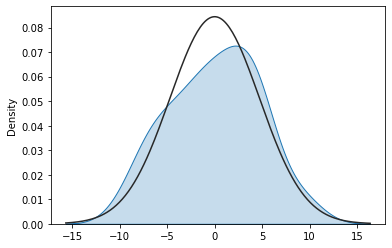

In [29]:
#Check it's running before putting it into the model
model = smf.mixedlm("cc_normalized_per_volume ~ group_id", df, groups = "file_id").fit()
model.summary()
ax = sns.distplot(model.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = scipy.stats.norm)

((array([-2.28017173, -1.92017484, -1.7091256 , -1.55469152, -1.43036801,
         -1.3249031 , -1.23241216, -1.14940983, -1.07365152, -1.00360143,
         -0.93815914, -0.87650695, -0.81801894, -0.76220403, -0.70866868,
         -0.65709167, -0.60720655, -0.55878903, -0.51164772, -0.46561731,
         -0.42055328, -0.37632784, -0.33282677, -0.28994682, -0.24759369,
         -0.20568029, -0.16412527, -0.12285188, -0.08178679, -0.04085922,
          0.        ,  0.04085922,  0.08178679,  0.12285188,  0.16412527,
          0.20568029,  0.24759369,  0.28994682,  0.33282677,  0.37632784,
          0.42055328,  0.46561731,  0.51164772,  0.55878903,  0.60720655,
          0.65709167,  0.70866868,  0.76220403,  0.81801894,  0.87650695,
          0.93815914,  1.00360143,  1.07365152,  1.14940983,  1.23241216,
          1.3249031 ,  1.43036801,  1.55469152,  1.7091256 ,  1.92017484,
          2.28017173]),
  array([ 0.        ,  0.        ,  3.36498007,  3.39516929,  4.56467076,
          4.94

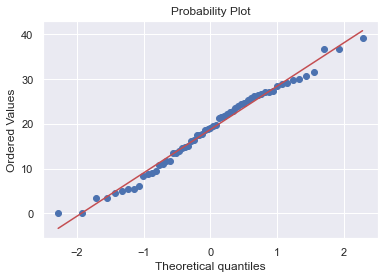

In [43]:
scipy.stats.probplot(df['cc_normalized_per_volume'], dist="norm", plot=plt)

In [ ]:
sns.set_theme()

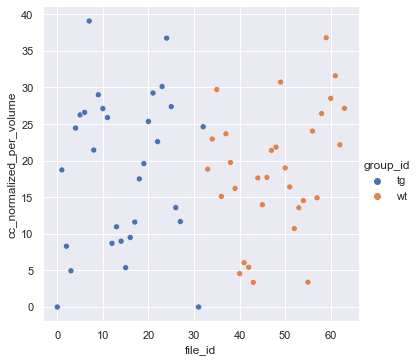

In [23]:
sns.relplot(data=df, x="file_id", y="cc_normalized_per_volume", hue="group_id")

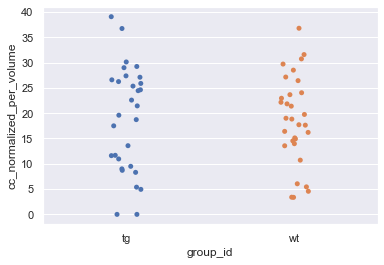

In [21]:
sns.stripplot(data=df, x='group_id', y='cc_normalized_per_volume')

Example of a regression plot

Text(0.5, 1.0, 'correlation between normalized area and volume')

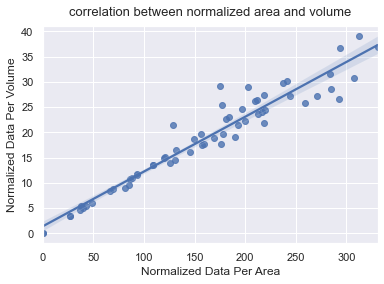

In [30]:
sns.regplot(data=df, x='cc_normalized_per_area', y='cc_normalized_per_volume')
plt.xlabel('Normalized Data Per Area', fontsize=12)
plt.ylabel('Normalized Data Per Volume', fontsize=12)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#plt.text(17, 95, 'r = 0.68\np = 0.03', fontsize=11)
plt.title('correlation between normalized area and volume', fontsize=13, pad=10)
#plt.savefig('correlation_analysis_expert_vs_findmycells.png', dpi=300)
#plt.show()